In [94]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from pandas.plotting import scatter_matrix


In [95]:
housing_df = pd.read_csv('train.csv')
train_df = housing_df.copy()
train_df.drop("id", axis=1, inplace=True)

In [96]:
train_df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,34291,24,1,0,47,35693,2,1,2000,0,1,8,5196,369,0,3,3436795.2
1,95145,60,0,1,60,34773,1,4,2000,0,1,729,4496,277,0,6,9519958.0
2,92661,45,1,1,62,45457,4,8,2020,1,1,7473,8953,245,1,9,9276448.1
3,97184,99,0,0,59,15113,1,1,2000,0,1,6424,8522,256,1,9,9725732.2
4,61752,100,0,0,57,64245,8,4,2018,1,0,7151,2786,863,0,7,6181908.8


In [97]:
train_df.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,2.273000e+04,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,2.273000e+04
mean,4.658622e+04,48.241091,0.475891,0.452750,47.305983,50013.795996,5.585042,5.620766,2008.005059,0.467972,0.460009,5283.646634,5067.981698,530.469644,0.461681,5.153058,4.634457e+06
std,4.952124e+04,28.226428,0.499429,0.497773,47.777207,30006.637729,2.739533,2.713026,118.826777,0.498984,0.498409,3047.084412,3097.347939,274.840604,0.498540,3.055246,2.925163e+06
min,8.900000e+01,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.000000,0.000000,0.000000,4.000000,1.000000,4.000000,0.000000,0.000000,1.031350e+04
25%,2.039275e+04,25.000000,0.000000,0.000000,25.000000,22936.000000,3.000000,3.000000,2000.000000,0.000000,0.000000,2977.250000,2599.000000,297.000000,0.000000,3.000000,2.041739e+06
50%,4.448400e+04,47.000000,0.000000,0.000000,45.000000,50414.000000,6.000000,6.000000,2006.000000,0.000000,0.000000,5359.000000,4977.000000,515.000000,0.000000,5.000000,4.450823e+06
75%,7.154700e+04,75.000000,1.000000,1.000000,69.000000,76291.000000,8.000000,8.000000,2014.000000,1.000000,1.000000,7746.000000,7652.000000,767.000000,1.000000,8.000000,7.159920e+06
max,6.071330e+06,100.000000,1.000000,1.000000,6000.000000,491100.000000,10.000000,10.000000,10000.000000,1.000000,1.000000,91992.000000,96381.000000,9017.000000,1.000000,10.000000,1.000428e+07


In [98]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22730 entries, 0 to 22729
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       22730 non-null  int64  
 1   numberOfRooms      22730 non-null  int64  
 2   hasYard            22730 non-null  int64  
 3   hasPool            22730 non-null  int64  
 4   floors             22730 non-null  int64  
 5   cityCode           22730 non-null  int64  
 6   cityPartRange      22730 non-null  int64  
 7   numPrevOwners      22730 non-null  int64  
 8   made               22730 non-null  int64  
 9   isNewBuilt         22730 non-null  int64  
 10  hasStormProtector  22730 non-null  int64  
 11  basement           22730 non-null  int64  
 12  attic              22730 non-null  int64  
 13  garage             22730 non-null  int64  
 14  hasStorageRoom     22730 non-null  int64  
 15  hasGuestRoom       22730 non-null  int64  
 16  price              227

EDA

Один из домов был сделан в 10000 году, что намекает о выбросе

In [99]:
train_df[train_df['made']==train_df['made'].max()]

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
2113,68038,41,0,0,54,87120,3,6,10000,1,1,6537,6304,366,0,0,6807415.1
3608,80062,81,1,0,35,67157,9,4,10000,0,1,732,6475,758,0,4,8007951.1
19124,80062,52,0,0,84,67099,9,4,10000,0,0,7677,5017,148,0,4,8007951.1
19748,80062,58,0,1,86,40408,7,8,10000,0,0,7059,7307,287,0,2,8007951.1
21400,80062,78,0,0,84,59457,4,7,10000,1,0,6382,9507,298,1,4,8007951.1


<AxesSubplot:xlabel='made'>

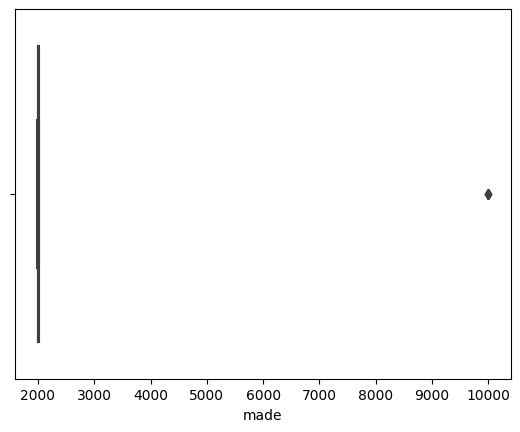

In [100]:
sns.boxplot(train_df, x='made')

Судя по всему это всё-таки какой-то выброс, поэтому лучше дропнуть эти дома из датасета

In [101]:
train_df = train_df.loc[train_df['made']!=train_df['made'].max()]
train_df['made'].max()


2021

<AxesSubplot:xlabel='made', ylabel='Count'>

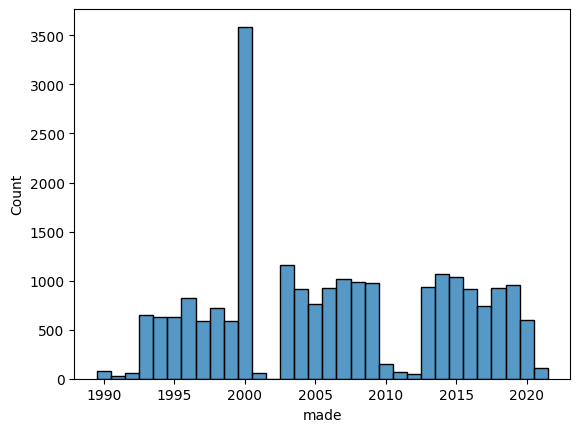

In [102]:
sns.histplot(train_df, x='made', discrete=True, stat='count')

Много домов было построено в 2000 году, возможно, было бы хорошо разбить данные по домам

<AxesSubplot:xlabel='yr_bin', ylabel='Count'>

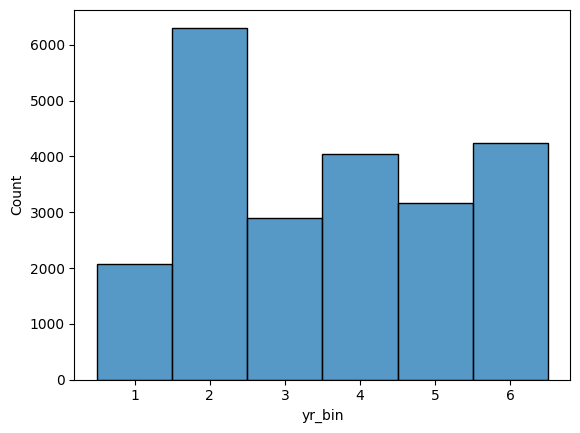

In [103]:
train_df['yr_bin'] = pd.cut(x=train_df['made'], bins=6, right=True, labels=[1, 2, 3, 4, 5, 6])
sns.histplot(data=train_df, x='yr_bin', discrete=True, stat='count')

<AxesSubplot:>

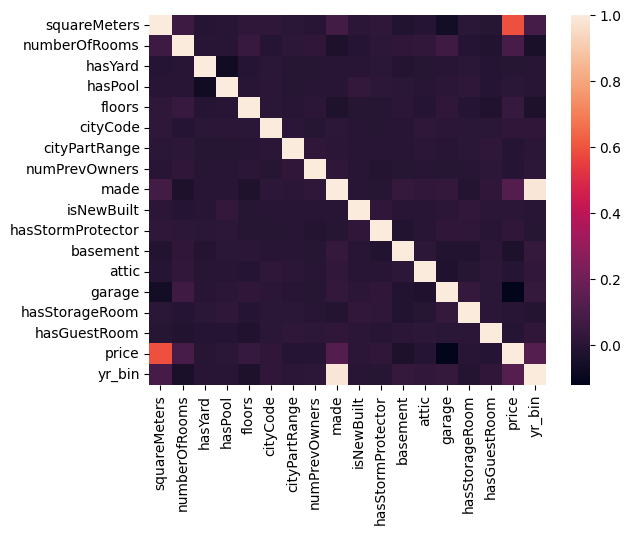

In [104]:
train_df['yr_bin'] = train_df['yr_bin'].astype(int)
sns.heatmap(train_df.corr())

In [105]:
def plot_scatter_matrix(attributes, df):
    scatter_matrix(df[attributes], figsize=(12, 8))
    plt.show()

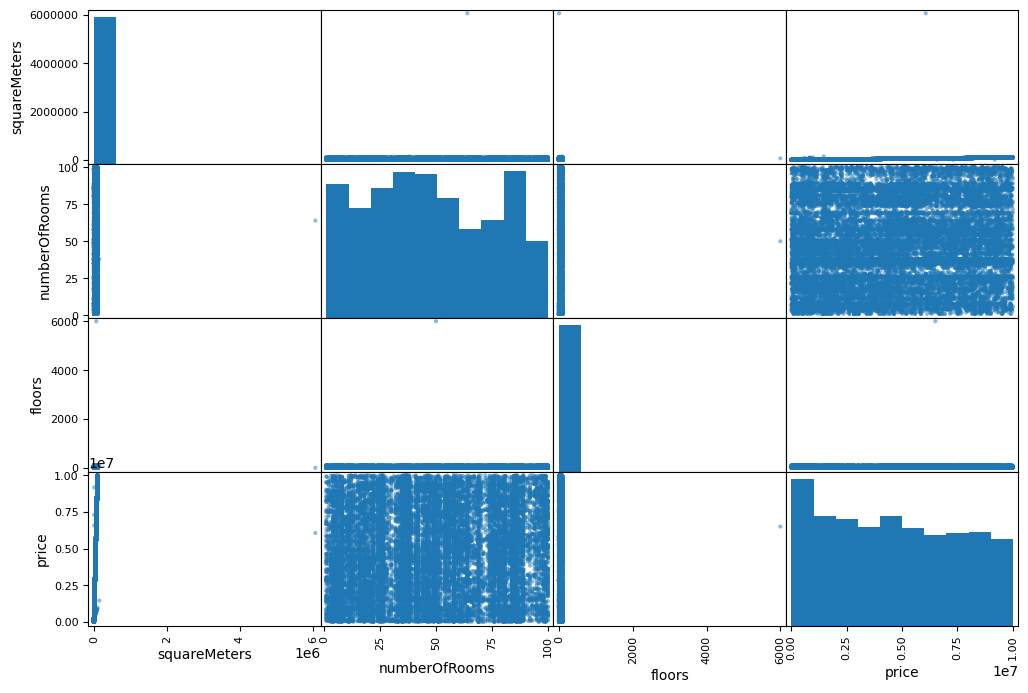

In [106]:
attributes = ['squareMeters', 'numberOfRooms', 'floors', 'price'] 
plot_scatter_matrix(attributes, train_df)

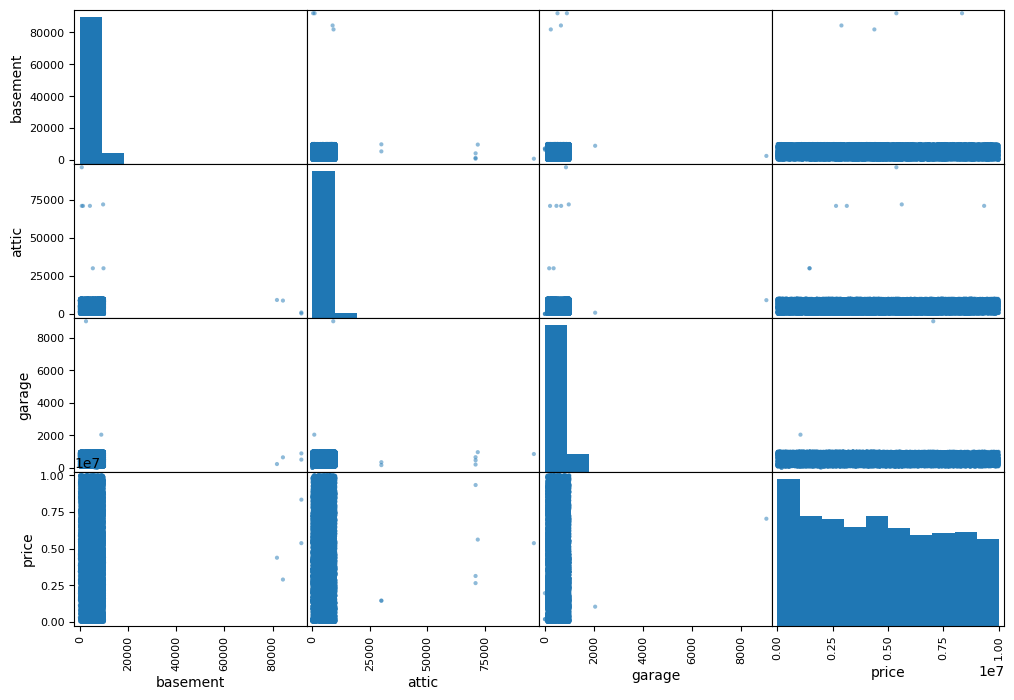

In [107]:
attributes = [ 'basement', 'attic', 'garage', 'price']
plot_scatter_matrix(attributes, train_df)

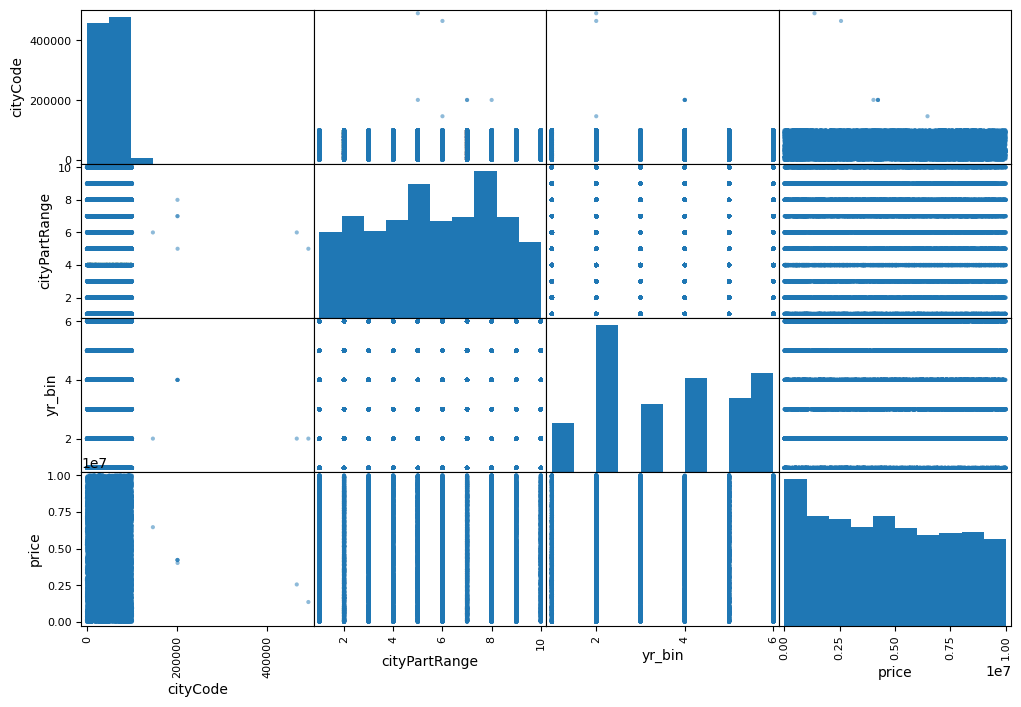

In [108]:
attributes = ['cityCode', 'cityPartRange', 'yr_bin', 'price']
plot_scatter_matrix(attributes, train_df)

In [109]:
def clean_df(df):

    Q1 = df.quantile(q=.25)
    Q3 = df.quantile(q=.75)
    IQR = df.apply(stats.iqr)
    deleted_rows = df[((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR)))].shape[0]
    df = df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR)))]
    
    print(deleted_rows)
    
    return df

<h4>SqareMeters</h4>

In [110]:
train_df[train_df['squareMeters']==train_df['squareMeters'].max()]

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,yr_bin
15334,6071330,64,0,0,5,86523,10,8,2019,1,1,6361,2412,874,1,5,6071330.9,6


<AxesSubplot:xlabel='squareMeters'>

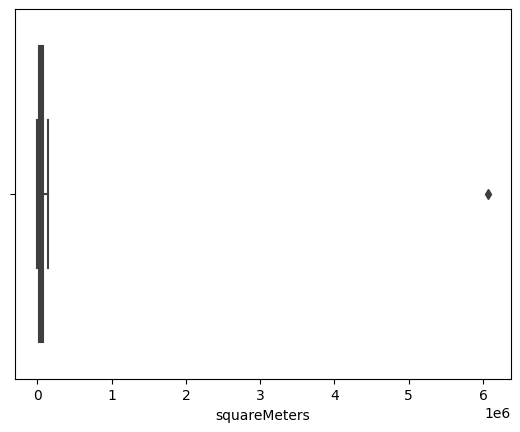

In [111]:
sns.boxplot(train_df, x='squareMeters')

In [112]:
train_df = train_df.loc[train_df['squareMeters']!=train_df['squareMeters'].max()]
train_df['squareMeters'].max()

146181

<AxesSubplot:xlabel='squareMeters'>

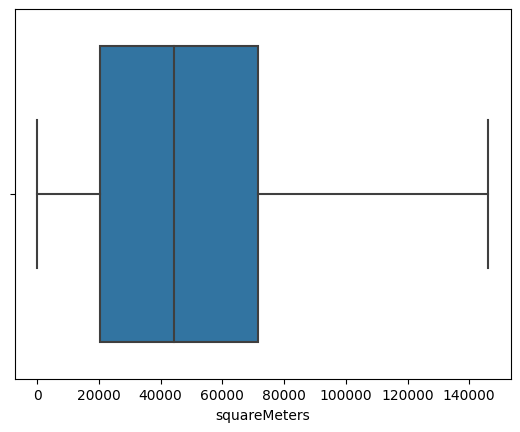

In [113]:
sns.boxplot(train_df, x='squareMeters')

In [114]:
train_df['squareMeters'].max()

146181

<h4>numberOfRooms</h4>

<AxesSubplot:xlabel='numberOfRooms'>

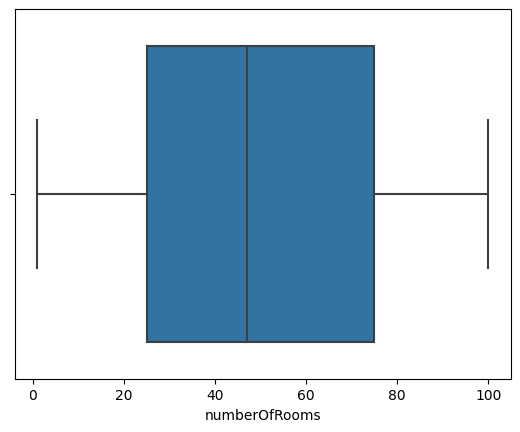

In [116]:
sns.boxplot(train_df, x='numberOfRooms')

Выбросы если и есть, то не особо выражены

<AxesSubplot:xlabel='floors'>

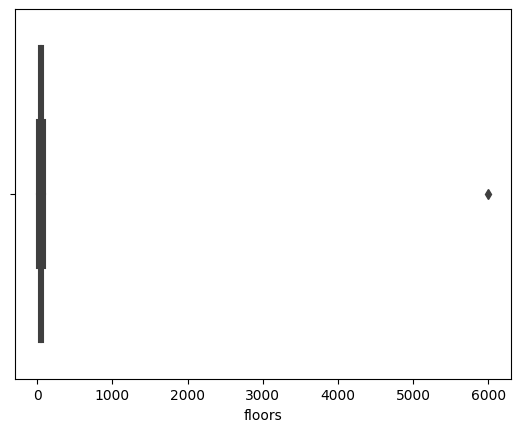

In [117]:
sns.boxplot(train_df, x='floors')

In [118]:
train_df[train_df['floors']==train_df['floors'].max()]

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,yr_bin
5659,65029,50,0,1,6000,79146,4,5,2012,0,1,5123,230,668,0,4,6507042.1,5


In [119]:
train_df = train_df.loc[train_df['floors']!=train_df['floors'].max()]
train_df['floors'].max()

100

<AxesSubplot:xlabel='floors'>

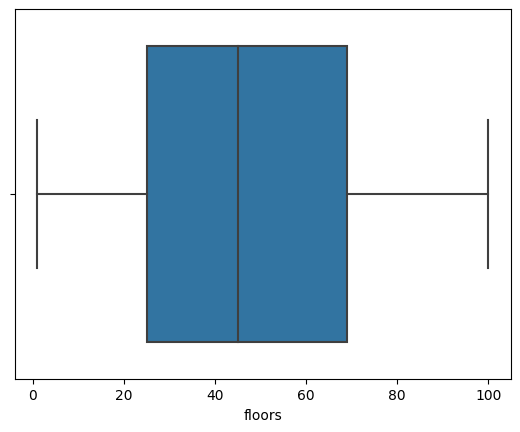

In [120]:
sns.boxplot(train_df, x='floors')